# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

*  Apply Decision Tree , KNN and Linear Classifier on Zoo dataset


## Dataset

### Description


In this experiment we will be using a Zoo dataset. The "type" attribute appears to be the class attribute. Here is a breakdown of which animals are in which type:


1 -- Mammals (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf 

2 -- Birds (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren 

3 -- Reptiles (5) pitviper, seasnake, slowworm, tortoise, tuatara 

4 -- Aquatic (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna 

5 -- Amphibians (4) frog, frog, newt, toad 

6 -- Insects (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp 

7 -- Arthropods (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm



### Keywords

* Numpy
* Pandas
* ID3 Algorithm
* Train, Test Split

### Setup Steps

In [0]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id = "2001337" #@param {type:"string"}



In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9003201490" #@param {type:"string"}


In [123]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="08_KNN_DT_LC_Zoo_data" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Zoo_New.csv")
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return


def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
     # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing Required Packages

In [0]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

#### Loading Dataset

In [0]:
#Import all columns omitting the fist which consists the names of the animals
dataset = pd.read_csv('Zoo_New.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We don't use animal name for classification because it is just a string stating the 
#name and it won't provide any extra information for classification in this context
dataset=dataset.drop('animal_name',axis=1)

In [126]:
dataset.head()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Let us check for the unique classes ( labels ) present in the dataset

In [127]:
np.unique(dataset['class'].values)

array([1, 2, 3, 4, 5, 6, 7])

Checking for the shape of the dataset

In [128]:
dataset.shape

(101, 17)

#### Splitting the datasets into train and test

In [0]:
training_data, testing_data = train_test_split(dataset,test_size=0.2)

In [130]:
training_data = training_data.values
print(len(training_data))

80


In [131]:
testing_data = testing_data.values
print(len(testing_data ))

21


#### Predict the class of test data

In [0]:
## Importing the package
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [134]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Fitting the data
clf = clf.fit(training_data[:,:16],training_data[:,16])

In [0]:
# Calculating the labels for test data
pred = clf.predict(testing_data[:,:16])

In [0]:
# Importing library to calculate accuracy score
from sklearn.metrics import accuracy_score

In [138]:
# Calculating accuracy
accuracy_score(testing_data[:,16], pred)

0.9523809523809523

saving the trained model (tree) in a png format using graphviz and os packages

In [139]:
import os
save_dot = "output" + ".dot"
save_png = "output"+ ".png"
graph = graphviz.Source(export_graphviz(clf, out_file=save_dot, filled = True,feature_names=(list(dataset.columns))[:-1]))
os.system("dot -T png -o " + save_png + " " + save_dot)

0

Plotting the tree

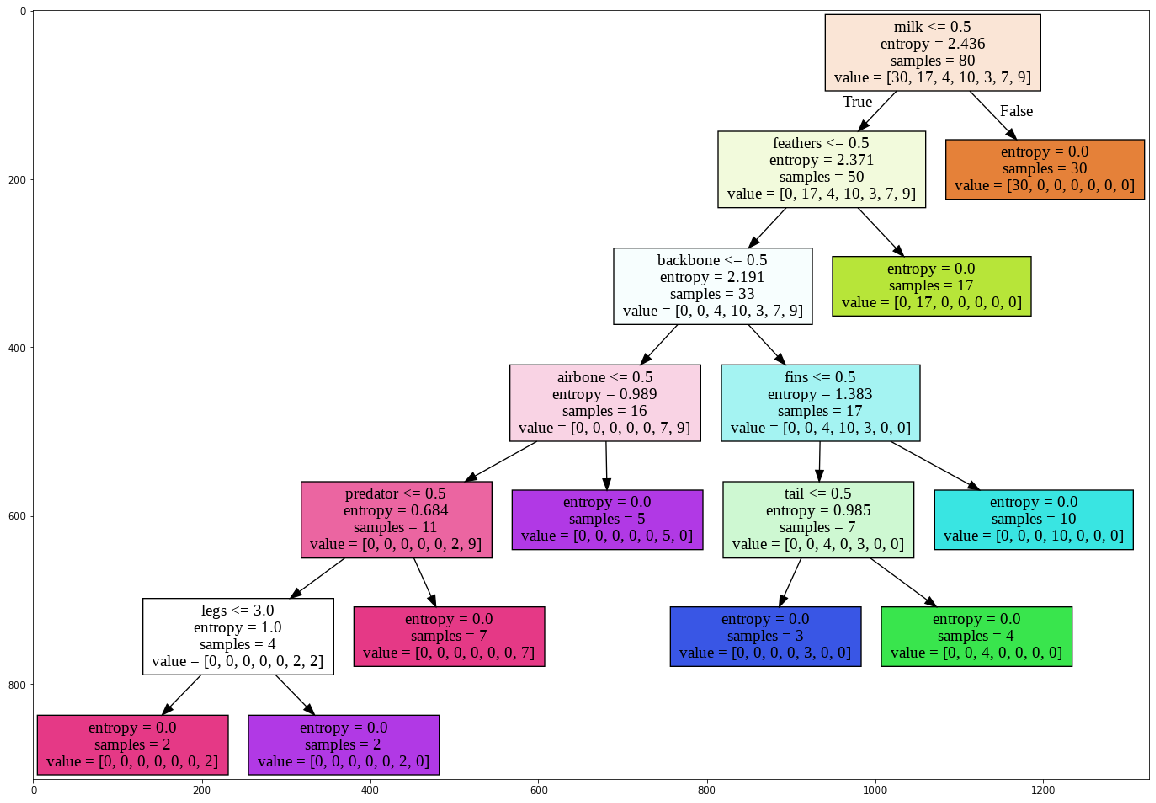

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(plt.imread(save_png))
plt.show()

#### Exercise 1

Change the train and test split ratio and observe the change in accuracy 

In [0]:
train_data, test_data = train_test_split(dataset,test_size=0.3)

In [142]:
train_data = train_data.values
print(len(train_data))

test_data = test_data.values
print(len(test_data ))

70
31


In [143]:
train_data

array([[1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2],
       ...,
       [0, 0, 1, ..., 0, 0, 5],
       [0, 0, 1, ..., 0, 0, 6],
       [0, 1, 1, ..., 1, 0, 2]])

In [144]:
test_data

array([[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 6, 0, 0, 0, 6],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 7],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 4],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 6],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 3],
       [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 4],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [0]:
y_train = train_data[:,-1]
x_train = train_data[:,:-1]

### Exercise 2

Classify the data using KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [148]:
x_train = scaler.fit_transform(x_train[:,:])
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [149]:
x_train

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [150]:
test_data = test_data.values

array([1, 7, 2, 1, 7, 2, 1, 2, 2, 7, 6, 1, 1, 2, 5, 2, 1, 1, 1, 1, 2, 1,
       1, 4, 2, 2, 1, 1, 4, 4, 1, 2, 5, 5, 1, 4, 6, 7, 1, 1, 1, 6, 1, 7,
       6, 1, 6, 3, 2, 1, 4, 6, 1, 3, 7, 1, 1, 1, 1, 6, 2, 1, 2, 1, 1, 4,
       2, 5, 6, 2])

In [151]:
neigh.score(x_train,y_train)

0.9571428571428572

In [0]:
y_test = test_data[:,-1]
x_test = test_data[:,:-1]
x_test = scaler.fit_transform(x_test[:,:])

In [154]:
neigh.predict(x_test)

array([6, 6, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 6, 1, 4, 4, 2, 4, 1, 7, 1, 1,
       4, 4, 1, 3, 4, 2, 1, 4, 2])

In [155]:
neigh.score(x_test,y_test)

0.9354838709677419

### Exercise 3

Classify the data using Linear Classifier

In [0]:
from sklearn import linear_model

In [0]:
linear_classifier = linear_model.SGDClassifier()

In [158]:
linear_classifier.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [159]:
linear_classifier.predict(x_train)

array([1, 7, 2, 1, 7, 2, 1, 2, 2, 7, 6, 1, 1, 2, 5, 2, 1, 1, 1, 1, 2, 1,
       1, 4, 2, 2, 1, 1, 4, 4, 1, 2, 5, 5, 1, 4, 7, 7, 1, 1, 1, 6, 1, 7,
       7, 1, 6, 3, 2, 1, 4, 6, 1, 3, 7, 1, 1, 1, 1, 6, 2, 1, 3, 1, 1, 4,
       2, 5, 6, 2])

In [160]:
linear_classifier.score(x_train,y_train)

1.0

In [161]:
linear_classifier.predict(x_test)

array([6, 7, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 6, 1, 4, 4, 2, 4, 1, 7, 1, 1,
       4, 4, 1, 3, 4, 2, 1, 4, 2])

In [162]:
linear_classifier.score(x_test,y_test)

0.967741935483871

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Very interesting" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [0]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [167]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 696
Date of submission:  05 Feb 2020
Time of submission:  10:52:56
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
